## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [33]:
import pandas as pd

import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

In [3]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [4]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [5]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [6]:
X.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
dtype: object

In [7]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
y.dtypes

medv    float64
dtype: object

In [9]:
boston_completo = pd.concat([X, y], axis=1)
boston_completo

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


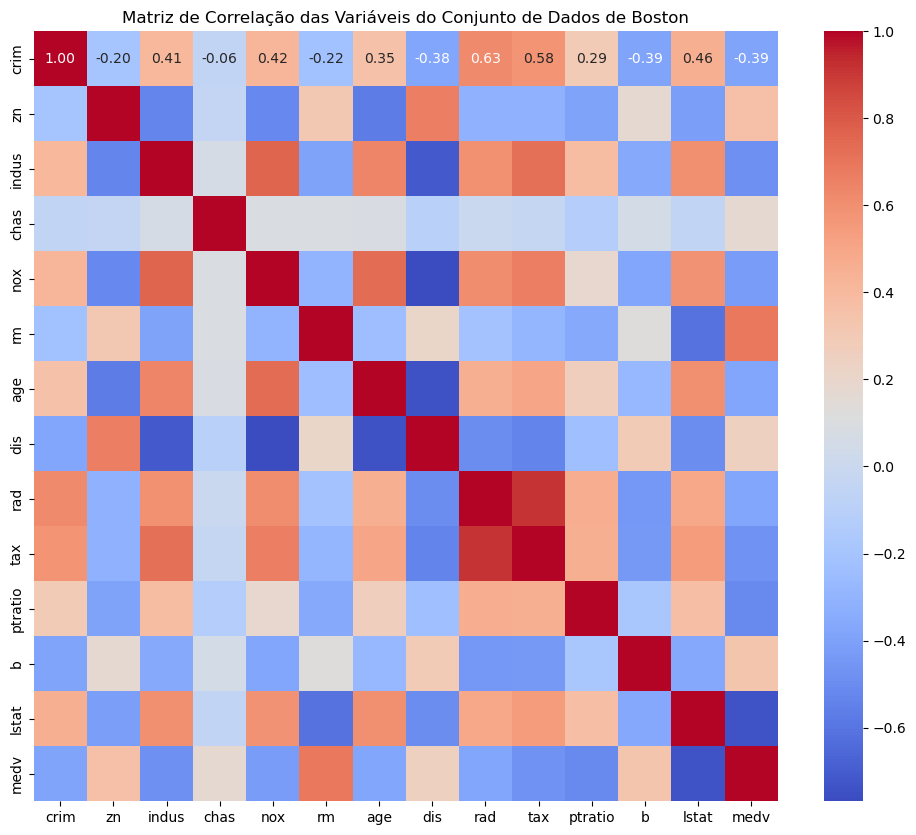

In [10]:
matriz_correlacao = boston_completo.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlação das Variáveis do Conjunto de Dados de Boston")
plt.show()

RM (número médio de quartos por habitação) tem uma correlação positiva forte com medv (0.70). Isso indica que casas com mais quartos tendem a ter valores mais altos.

LSTAT (% menor status da população) mostra uma forte correlação negativa com medv (-0.74). Isso sugere que bairros com uma proporção maior de residentes de baixa renda tendem a ter preços de casas mais baixos .

PTRATIO (proporção de alunos por professor) também tem uma correlação negativa moderada com medv (-0.51), sugerindo que valores mais altos (mais alunos por professor) podem estar associados a valores de habitação mais baixos, possivelmente refletindo a qualidade das escolas locais.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354, 1), (152, 1))

In [15]:
# Criando e treinando a árvore de decisão com profundidade máxima de 8
arvore_prof_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
arvore_prof_8.fit(X_train, y_train)

# Criando e treinando a árvore de decisão com profundidade máxima de 2
arvore_prof_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
arvore_prof_2.fit(X_train, y_train)

# Avaliando o desempenho das árvores no conjunto de treinamento usando R^2
r2_arvore_prof_8_train = arvore_prof_8.score(X_train, y_train)
r2_arvore_prof_2_train = arvore_prof_2.score(X_train, y_train)

r2_arvore_prof_8_train, r2_arvore_prof_2_train

(0.9800398034333819, 0.6995411306336253)

Text(0.5, 1.0, 'Árvore de Decisão com Profundidade Máxima de 8 (visão parcial)')

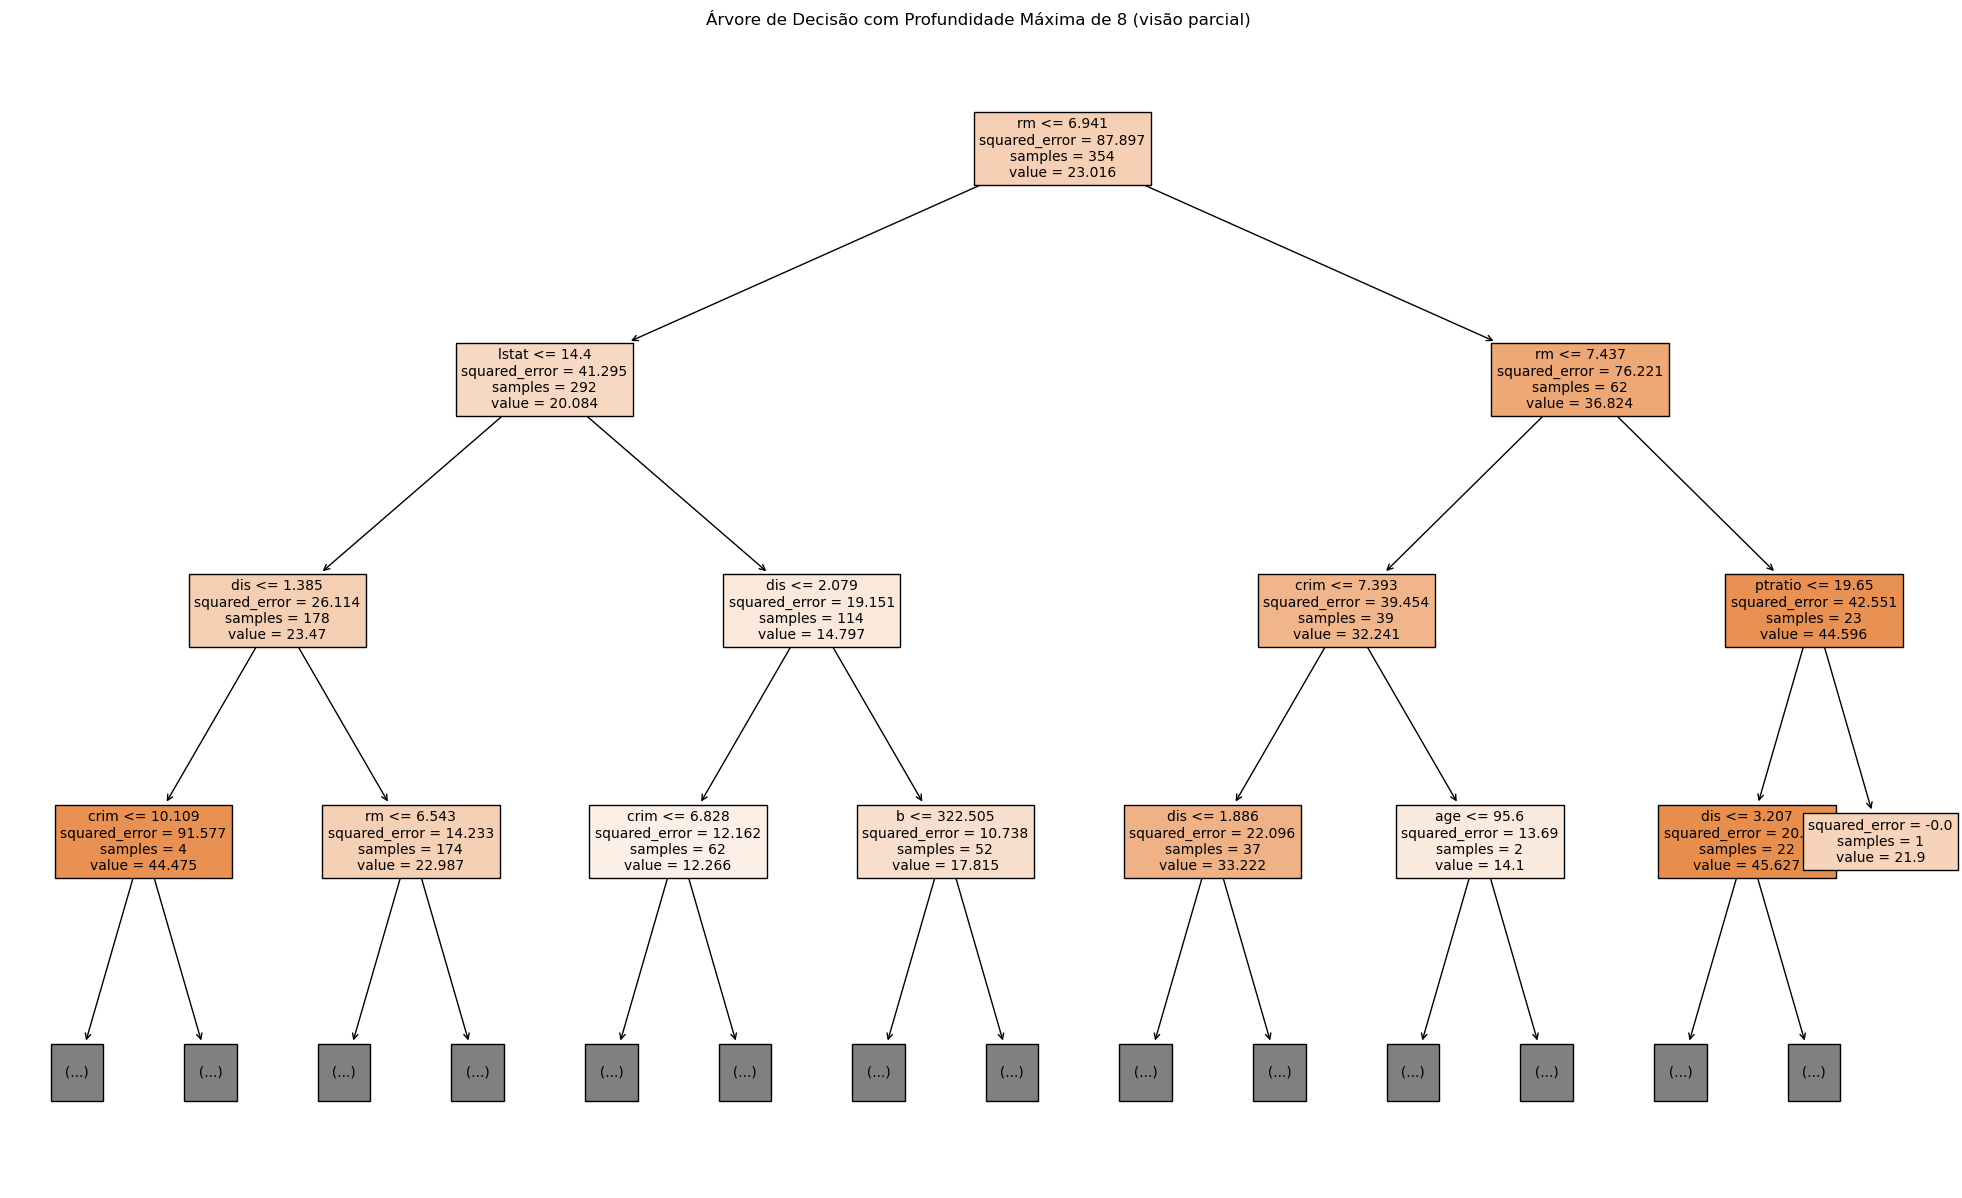

In [16]:
# Visualizando a árvore com profundidade máxima de 8
plt.figure(figsize=(25, 15))
plot_tree(arvore_prof_8, filled=True, feature_names=X.columns, fontsize=10, max_depth=3)
plt.title('Árvore de Decisão com Profundidade Máxima de 8 (visão parcial)')

Text(0.5, 1.0, 'Árvore de Decisão com Profundidade Máxima de 2')

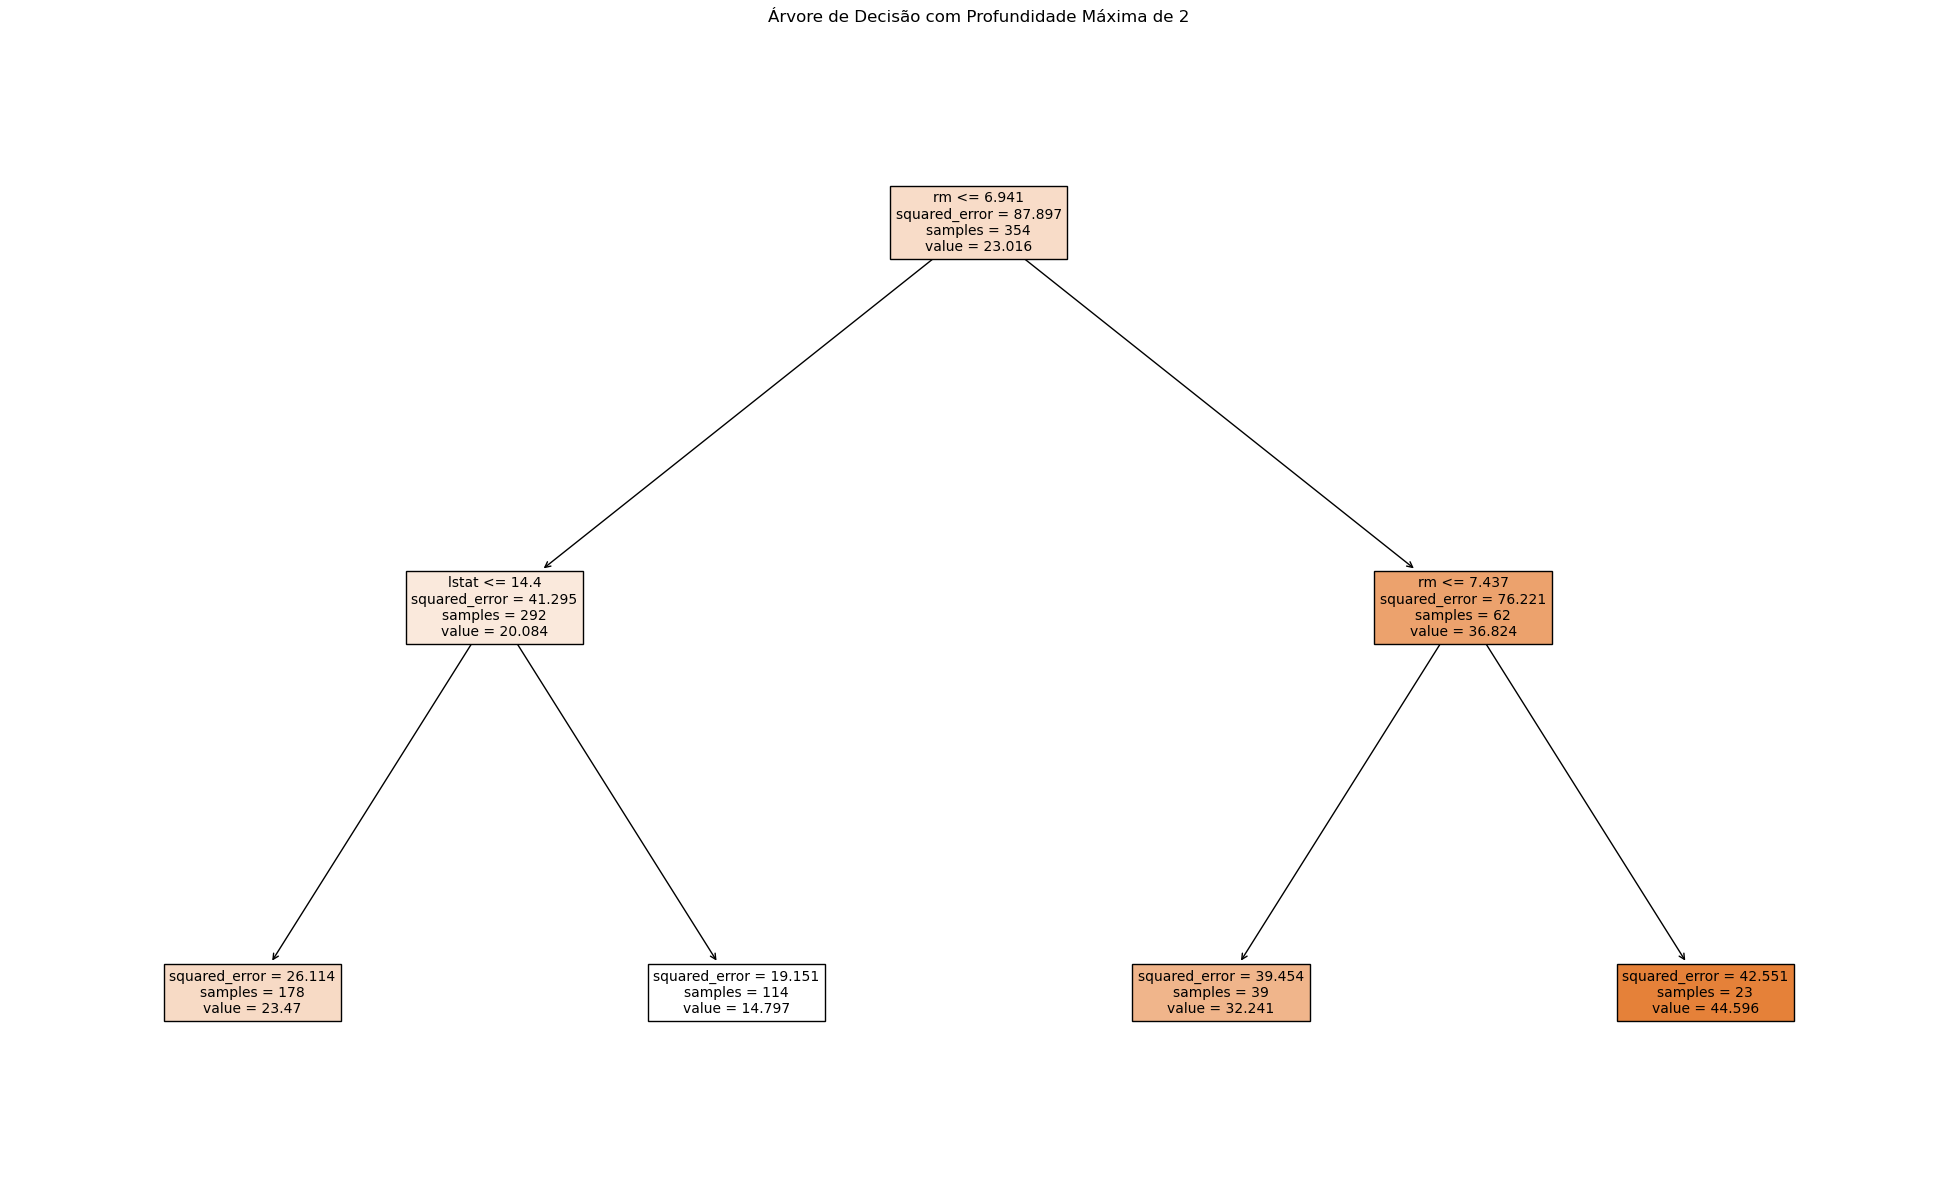

In [17]:
# Visualizando a árvore com profundidade máxima de 2
plt.figure(figsize=(25, 15))
plot_tree(arvore_prof_2, filled=True, feature_names=X.columns, fontsize=10)
plt.title('Árvore de Decisão com Profundidade Máxima de 2')

In [18]:
# Previsões no conjunto de treinamento
y_pred_treino_prof_8 = arvore_prof_8.predict(X_train)
y_pred_treino_prof_2 = arvore_prof_2.predict(X_train)

# Previsões no conjunto de teste
y_pred_teste_prof_8 = arvore_prof_8.predict(X_test)
y_pred_teste_prof_2 = arvore_prof_2.predict(X_test)

# Calculando o MSE para o conjunto de treinamento
mse_treino_prof_8 = mean_squared_error(y_train, y_pred_treino_prof_8)
mse_treino_prof_2 = mean_squared_error(y_train, y_pred_treino_prof_2)

# Calculando o MSE para o conjunto de teste
mse_teste_prof_8 = mean_squared_error(y_test, y_pred_teste_prof_8)
mse_teste_prof_2 = mean_squared_error(y_test, y_pred_teste_prof_2)

(mse_treino_prof_8, mse_treino_prof_2), (mse_teste_prof_8, mse_teste_prof_2)

((1.7544320046198307, 26.40929184885126),
 (11.014539951046743, 24.153896104489093))

A árvore com profundidade máxima de 8 tem um desempenho significativamente melhor no conjunto de treinamento, indicando um bom ajuste aos dados. Contudo, o aumento no MSE do treinamento para o teste sugere algum overfitting, embora ainda mantenha um desempenho razoavelmente bom.

A árvore com profundidade máxima de 2 tem um MSE relativamente alto tanto no treinamento quanto no teste, indicando que ela pode ser simples demais para capturar a complexidade dos dados, resultando em um alto viés.

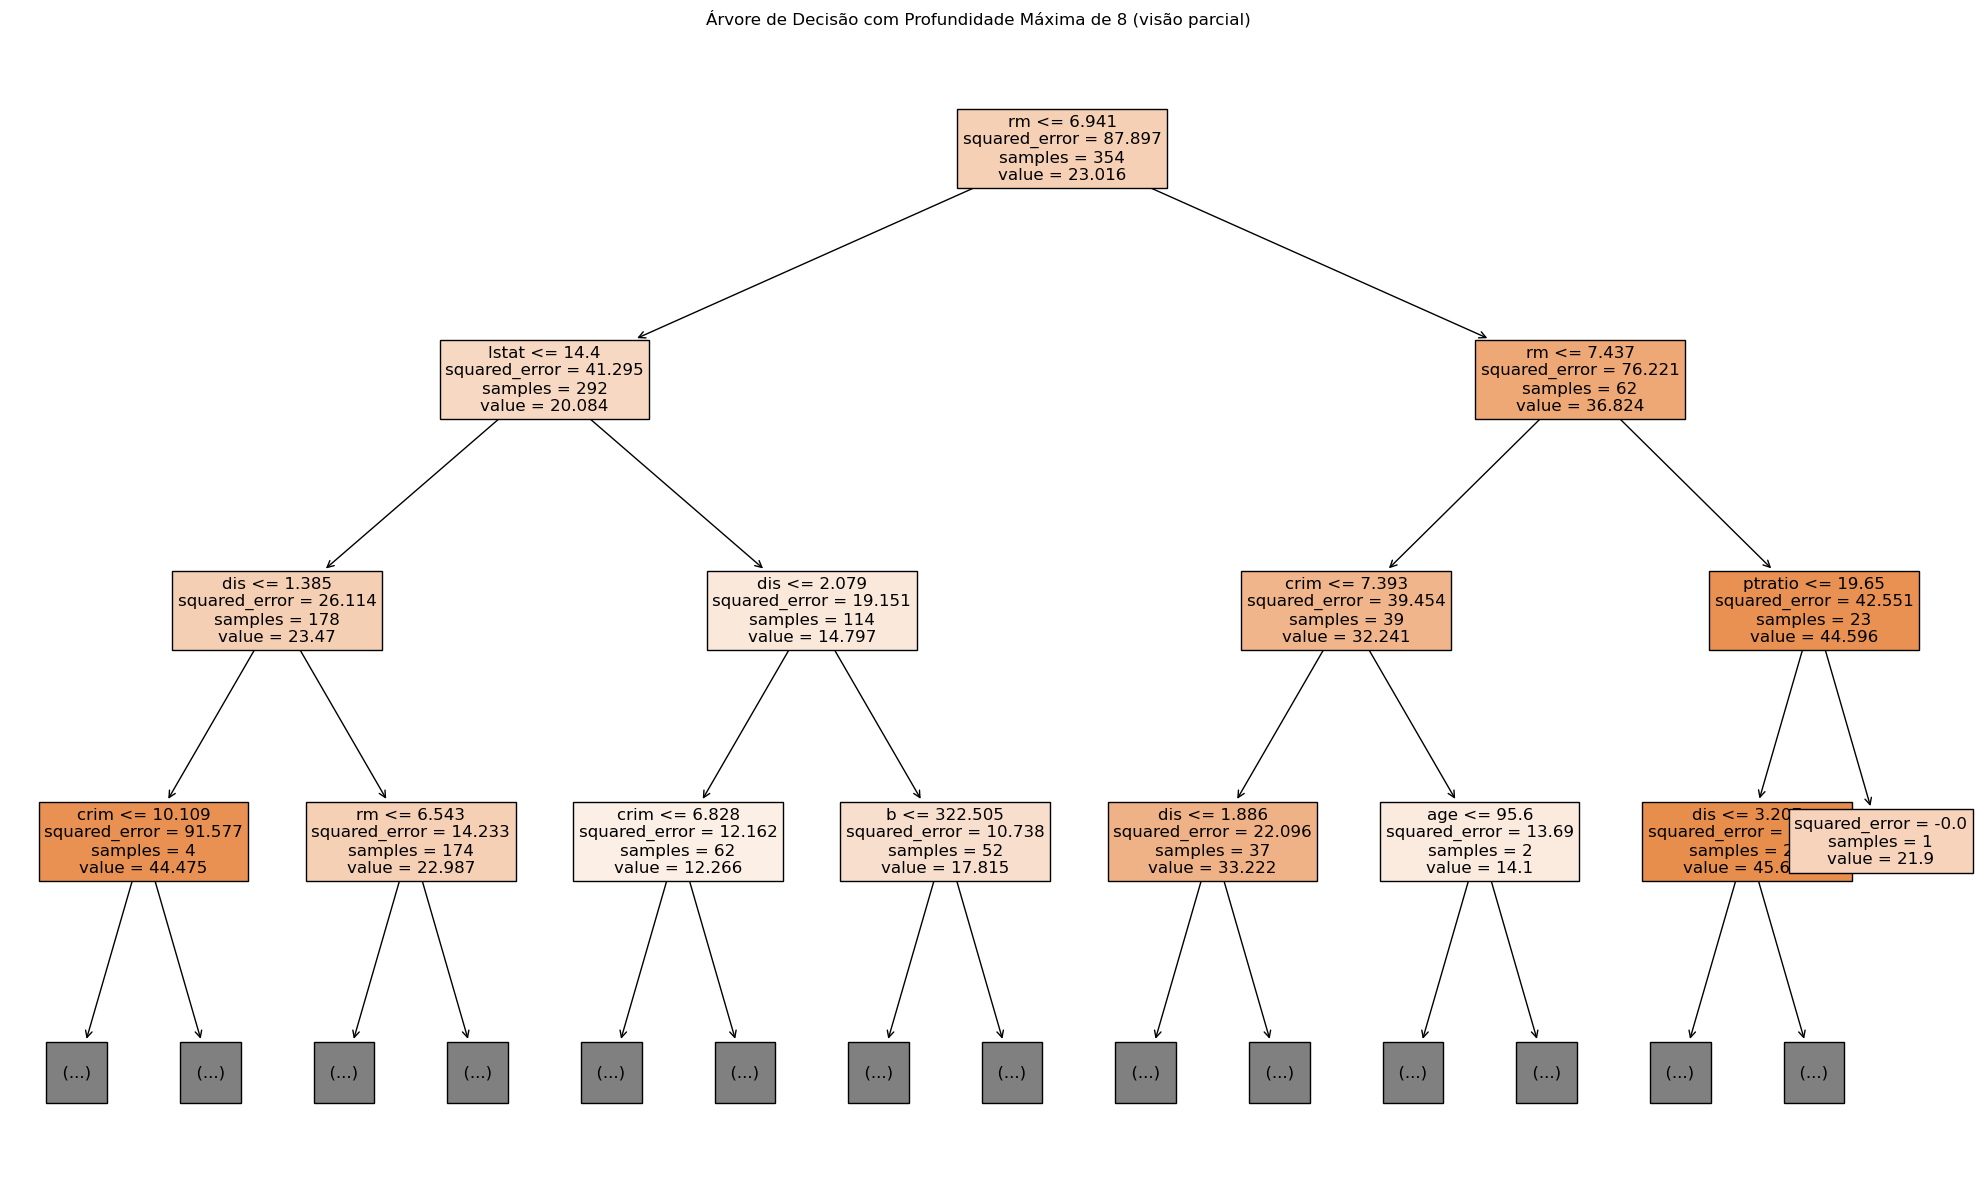

In [19]:
plt.figure(figsize=(25, 15))

# Visualizando a árvore com profundidade máxima de 8
plot_tree(arvore_prof_8, filled=True, feature_names=X.columns, fontsize=12, max_depth=3)
plt.title('Árvore de Decisão com Profundidade Máxima de 8 (visão parcial)')
plt.show()

A variável RM (número médio de quartos por habitação) aparece como a condição no nó raiz da árvore, o que indica que é uma das variáveis mais importantes para a predição do valor médio das casas.

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [24]:
# Obtendo o caminho de poda de complexidade de custo (valores de CCP-alfa)
path = arvore_prof_8.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas, impurities

(array([0.00000000e+00, 5.64971751e-05, 1.12994350e-04, 2.76836158e-04,
        9.03954802e-04, 9.22787194e-04, 1.41242938e-03, 1.70903955e-03,
        1.70903955e-03, 1.82297552e-03, 2.03389831e-03, 2.38700565e-03,
        2.76836158e-03, 2.82485876e-03, 3.05084746e-03, 3.22269303e-03,
        3.43220339e-03, 3.61581921e-03, 3.95951036e-03, 4.08192090e-03,
        5.76741996e-03, 7.62711864e-03, 1.01845574e-02, 1.04001883e-02,
        1.22578692e-02, 1.39571563e-02, 1.50318805e-02, 1.62711864e-02,
        1.73022599e-02, 1.76878061e-02, 1.97743252e-02, 2.22457627e-02,
        2.44821092e-02, 2.53446328e-02, 2.80190678e-02, 3.01704331e-02,
        3.01704331e-02, 3.16572505e-02, 3.44006163e-02, 3.46622963e-02,
        3.70291902e-02, 3.97834275e-02, 3.98493409e-02, 4.07203390e-02,
        4.25343936e-02, 4.35263653e-02, 4.68008475e-02, 4.81379473e-02,
        4.86853197e-02, 5.41059322e-02, 5.41071273e-02, 5.42480495e-02,
        5.46892655e-02, 5.68271904e-02, 6.08786016e-02, 6.647573

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [26]:
# Lista para armazenar os modelos treinados
arvores = []

# Treinando uma árvore para cada valor de alfa e armazenando na lista
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    arvores.append(clf)

# Verificando o número de árvores treinadas e armazenadas na lista
len(arvores)


98

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [29]:
# armazenar os resultados do MSE para cada árvore
mse_train_list = []
mse_test_list = []

# Calculando o MSE para cada árvore armazenada na lista
for arvore in arvores:
    y_train_pred = arvore.predict(X_train)
    y_test_pred = arvore.predict(X_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

# Criando um DataFrame para visualizar melhor os resultados
resultados_df = pd.DataFrame({
    'CCP_Alpha': ccp_alphas,
    'Train_MSE': mse_train_list,
    'Test_MSE': mse_test_list
})

resultados_df


,CCP_Alpha,Train_MSE,Test_MSE
0,0.000000,0.000000,19.933947
1,0.000056,0.000942,19.906274
2,0.000113,0.001758,19.921552
3,0.000277,0.005313,19.904143
4,0.000904,0.024353,19.991544
...,...,...,...
93,2.895942,18.413155,16.726911
94,5.100195,26.409292,24.153896
95,6.238163,32.647455,29.794604
96,14.764093,32.647455,29.794604


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

Valor de Alpha: 0.12797

MSE do Teste: 14.64

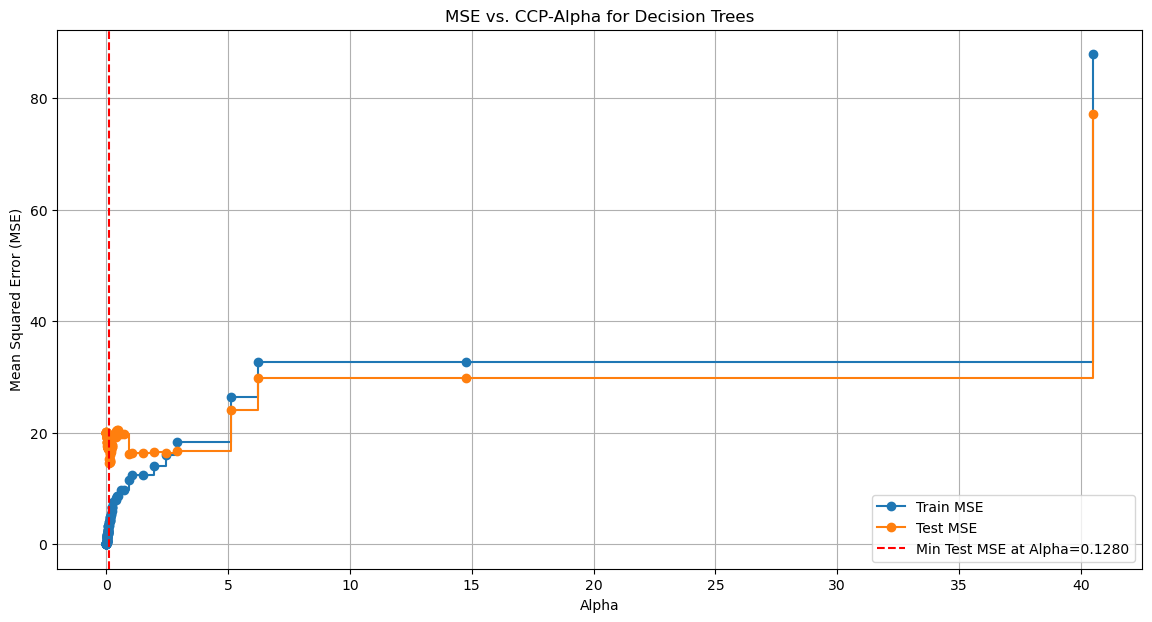

(0.1279675141242949, 14.643878629993127)

In [32]:
# Identificando o índice do menor MSE de teste
min_mse_index = np.argmin(mse_test_list)
min_mse_alpha = ccp_alphas[min_mse_index]

# Plotando o MSE por valor de alfa
plt.figure(figsize=(14, 7))
plt.plot(ccp_alphas, mse_train_list, marker='o', label='Train MSE', drawstyle="steps-post")
plt.plot(ccp_alphas, mse_test_list, marker='o', label='Test MSE', drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. CCP-Alpha for Decision Trees")
plt.axvline(x=min_mse_alpha, color='r', linestyle='--', label=f'Min Test MSE at Alpha={min_mse_alpha:.4f}')
plt.legend()
plt.grid(True)
plt.show()

min_mse_alpha, mse_test_list[min_mse_index]


O gráfico mostra o Mean Squared Error (MSE) para os conjuntos de treinamento e teste em função dos valores de CCP-alfa. A linha vermelha pontilhada indica o valor de alfa onde o MSE do teste é mínimo.


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [36]:
# Árvore selecionada com o alfa que minimiza o MSE no teste
arvore_selecionada = arvores[min_mse_index]

# Fazendo previsões com essa árvore nos conjuntos de treinamento e teste
y_train_pred = arvore_selecionada.predict(X_train)
y_test_pred = arvore_selecionada.predict(X_test)

# Calculando o R-quadrado para os conjuntos de treinamento e teste
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

r2_train, r2_test


(0.9537134557189908, 0.8034724162458747)

### 7. Visualize esta árvore.

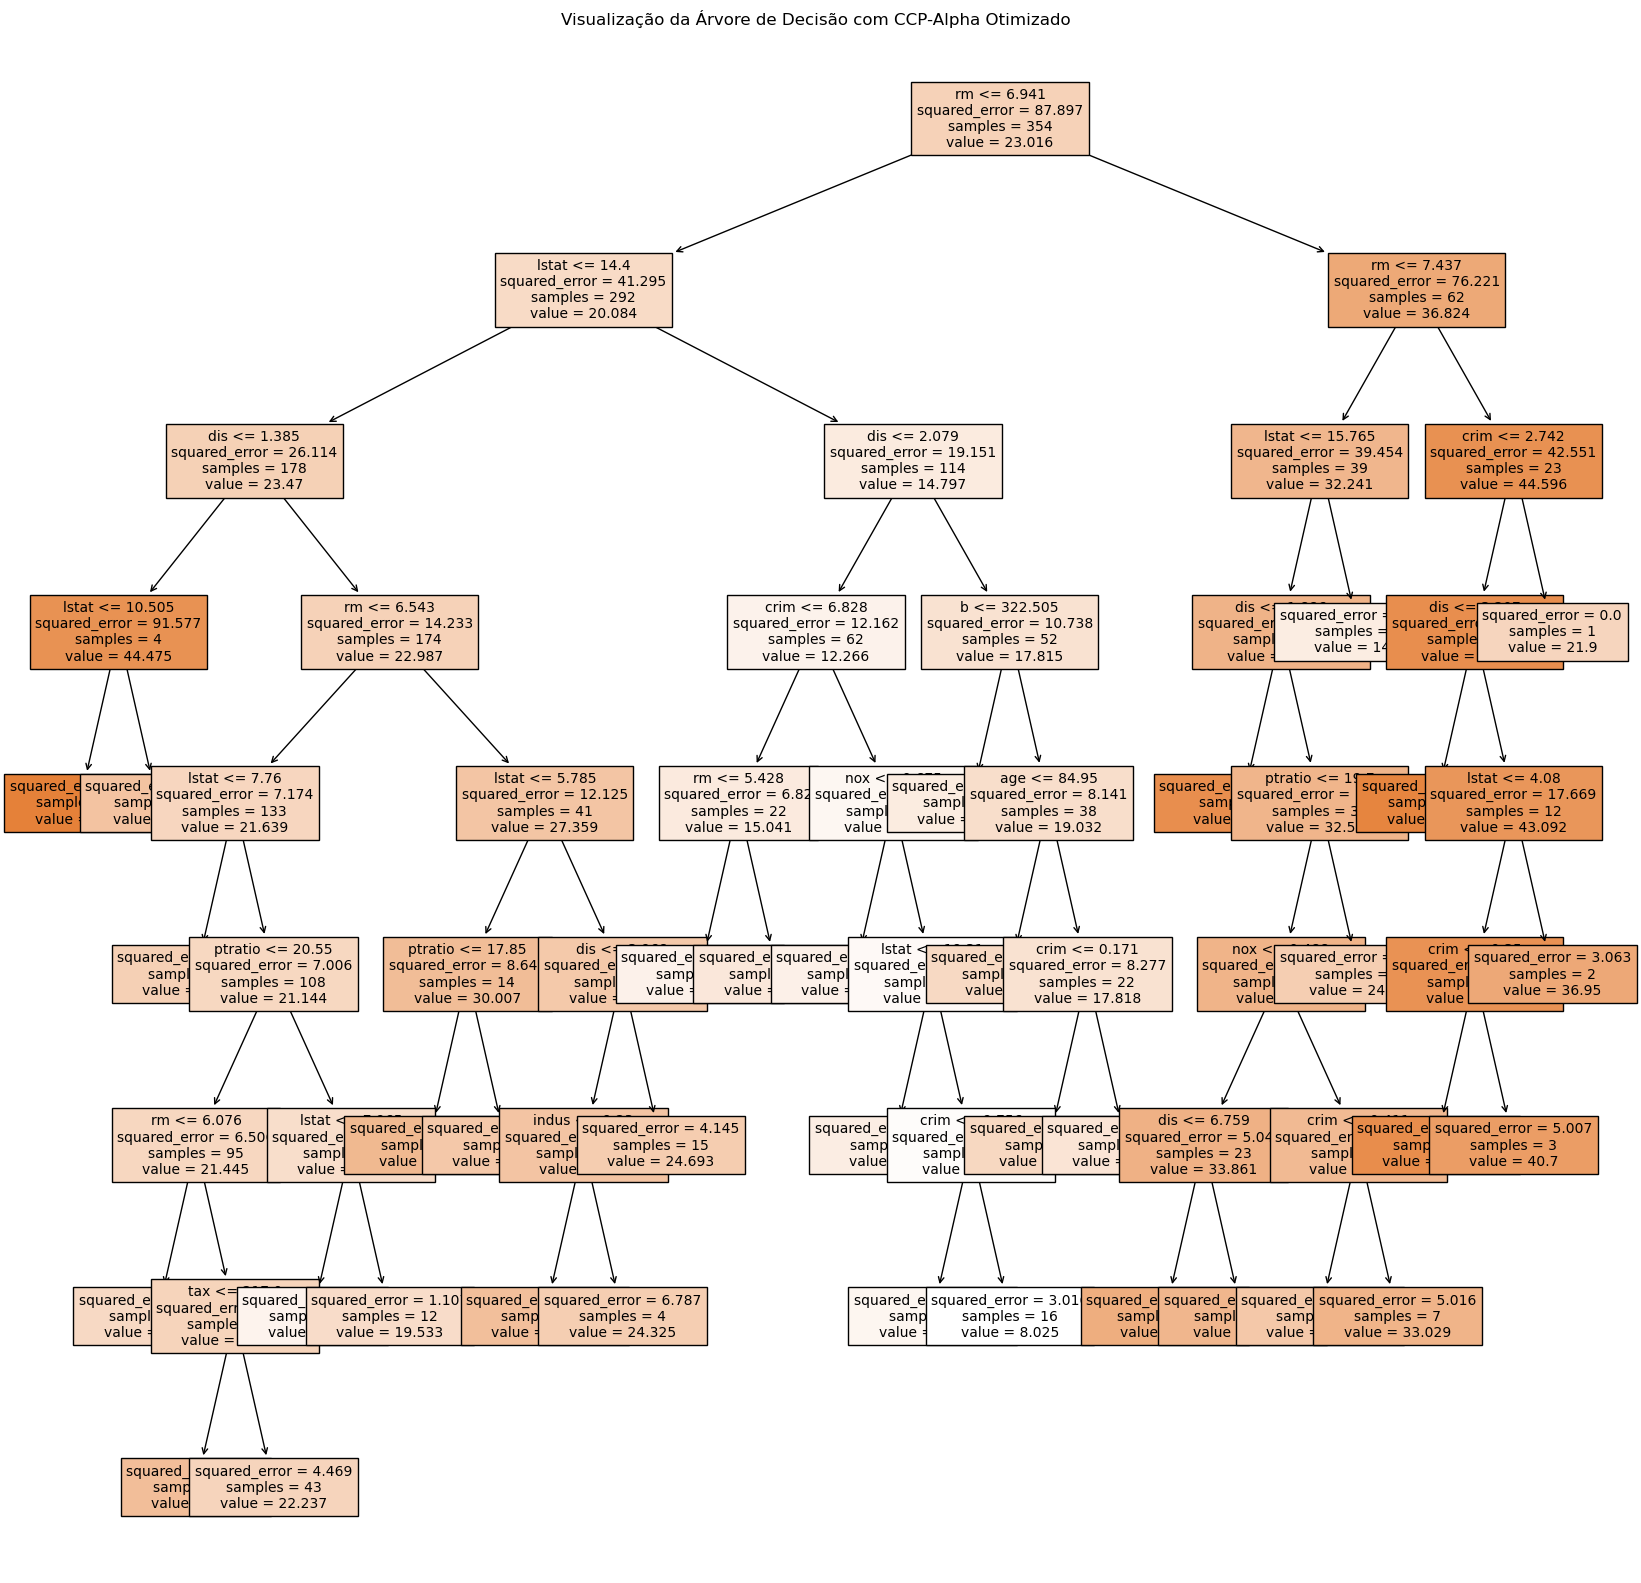

In [37]:
plt.figure(figsize=(20, 20))
plot_tree(arvore_selecionada, filled=True, feature_names=X.columns, fontsize=10)
plt.title('Visualização da Árvore de Decisão com CCP-Alpha Otimizado')
plt.show()
